In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [196]:
train_data = pd.read_csv('train.csv')
feature_data = pd.read_csv('features.csv')
store_data = pd.read_csv('stores.csv')
test_data = pd.read_csv('test.csv')

In [197]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [198]:
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [199]:
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [200]:
train_data.shape

(421570, 5)

In [201]:
feature_data.shape

(8190, 12)

In [202]:
store_data.shape

(45, 3)

In [203]:
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [204]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [205]:
train_data['Dept']

0          1
1          1
2          1
3          1
4          1
          ..
421565    98
421566    98
421567    98
421568    98
421569    98
Name: Dept, Length: 421570, dtype: int64

In [206]:
train = train_data.merge(store_data, how='left').merge(feature_data, how='left')

In [207]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [208]:
train.drop(columns=[ 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5',],inplace=True)

In [209]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [210]:
train.loc[train['Store']==1]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
10239,1,99,2012-08-31,20.06,False,A,151315,80.49,3.638,222.305480,6.908
10240,1,99,2012-09-07,0.05,True,A,151315,83.96,3.730,222.439015,6.908
10241,1,99,2012-09-14,0.03,False,A,151315,74.97,3.717,222.582019,6.908
10242,1,99,2012-10-05,635.00,False,A,151315,68.55,3.617,223.181477,6.573


## Outliers

In [211]:
train.loc[train['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
846,1,6,2012-08-10,-139.65,False,A,151315,85.05,3.494,221.958433,6.908
2384,1,18,2012-05-04,-1.27,False,A,151315,75.55,3.749,221.671800,7.143
6048,1,47,2010-02-19,-863.00,False,A,151315,39.93,2.514,211.289143,8.106
6049,1,47,2010-03-12,-698.00,False,A,151315,57.79,2.667,211.380643,8.106
6051,1,47,2010-10-08,-58.00,False,A,151315,63.93,2.633,211.746754,7.838
...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,B,118221,27.73,2.773,181.982317,8.992
419598,45,80,2010-02-19,-0.27,False,B,118221,31.27,2.745,182.034782,8.992
419603,45,80,2010-04-16,-1.61,False,B,118221,54.28,2.899,181.692477,8.899
419614,45,80,2010-07-02,-0.27,False,B,118221,76.61,2.815,182.318780,8.743


In [212]:
new_train=train.loc[train['Weekly_Sales']>0]
new_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667


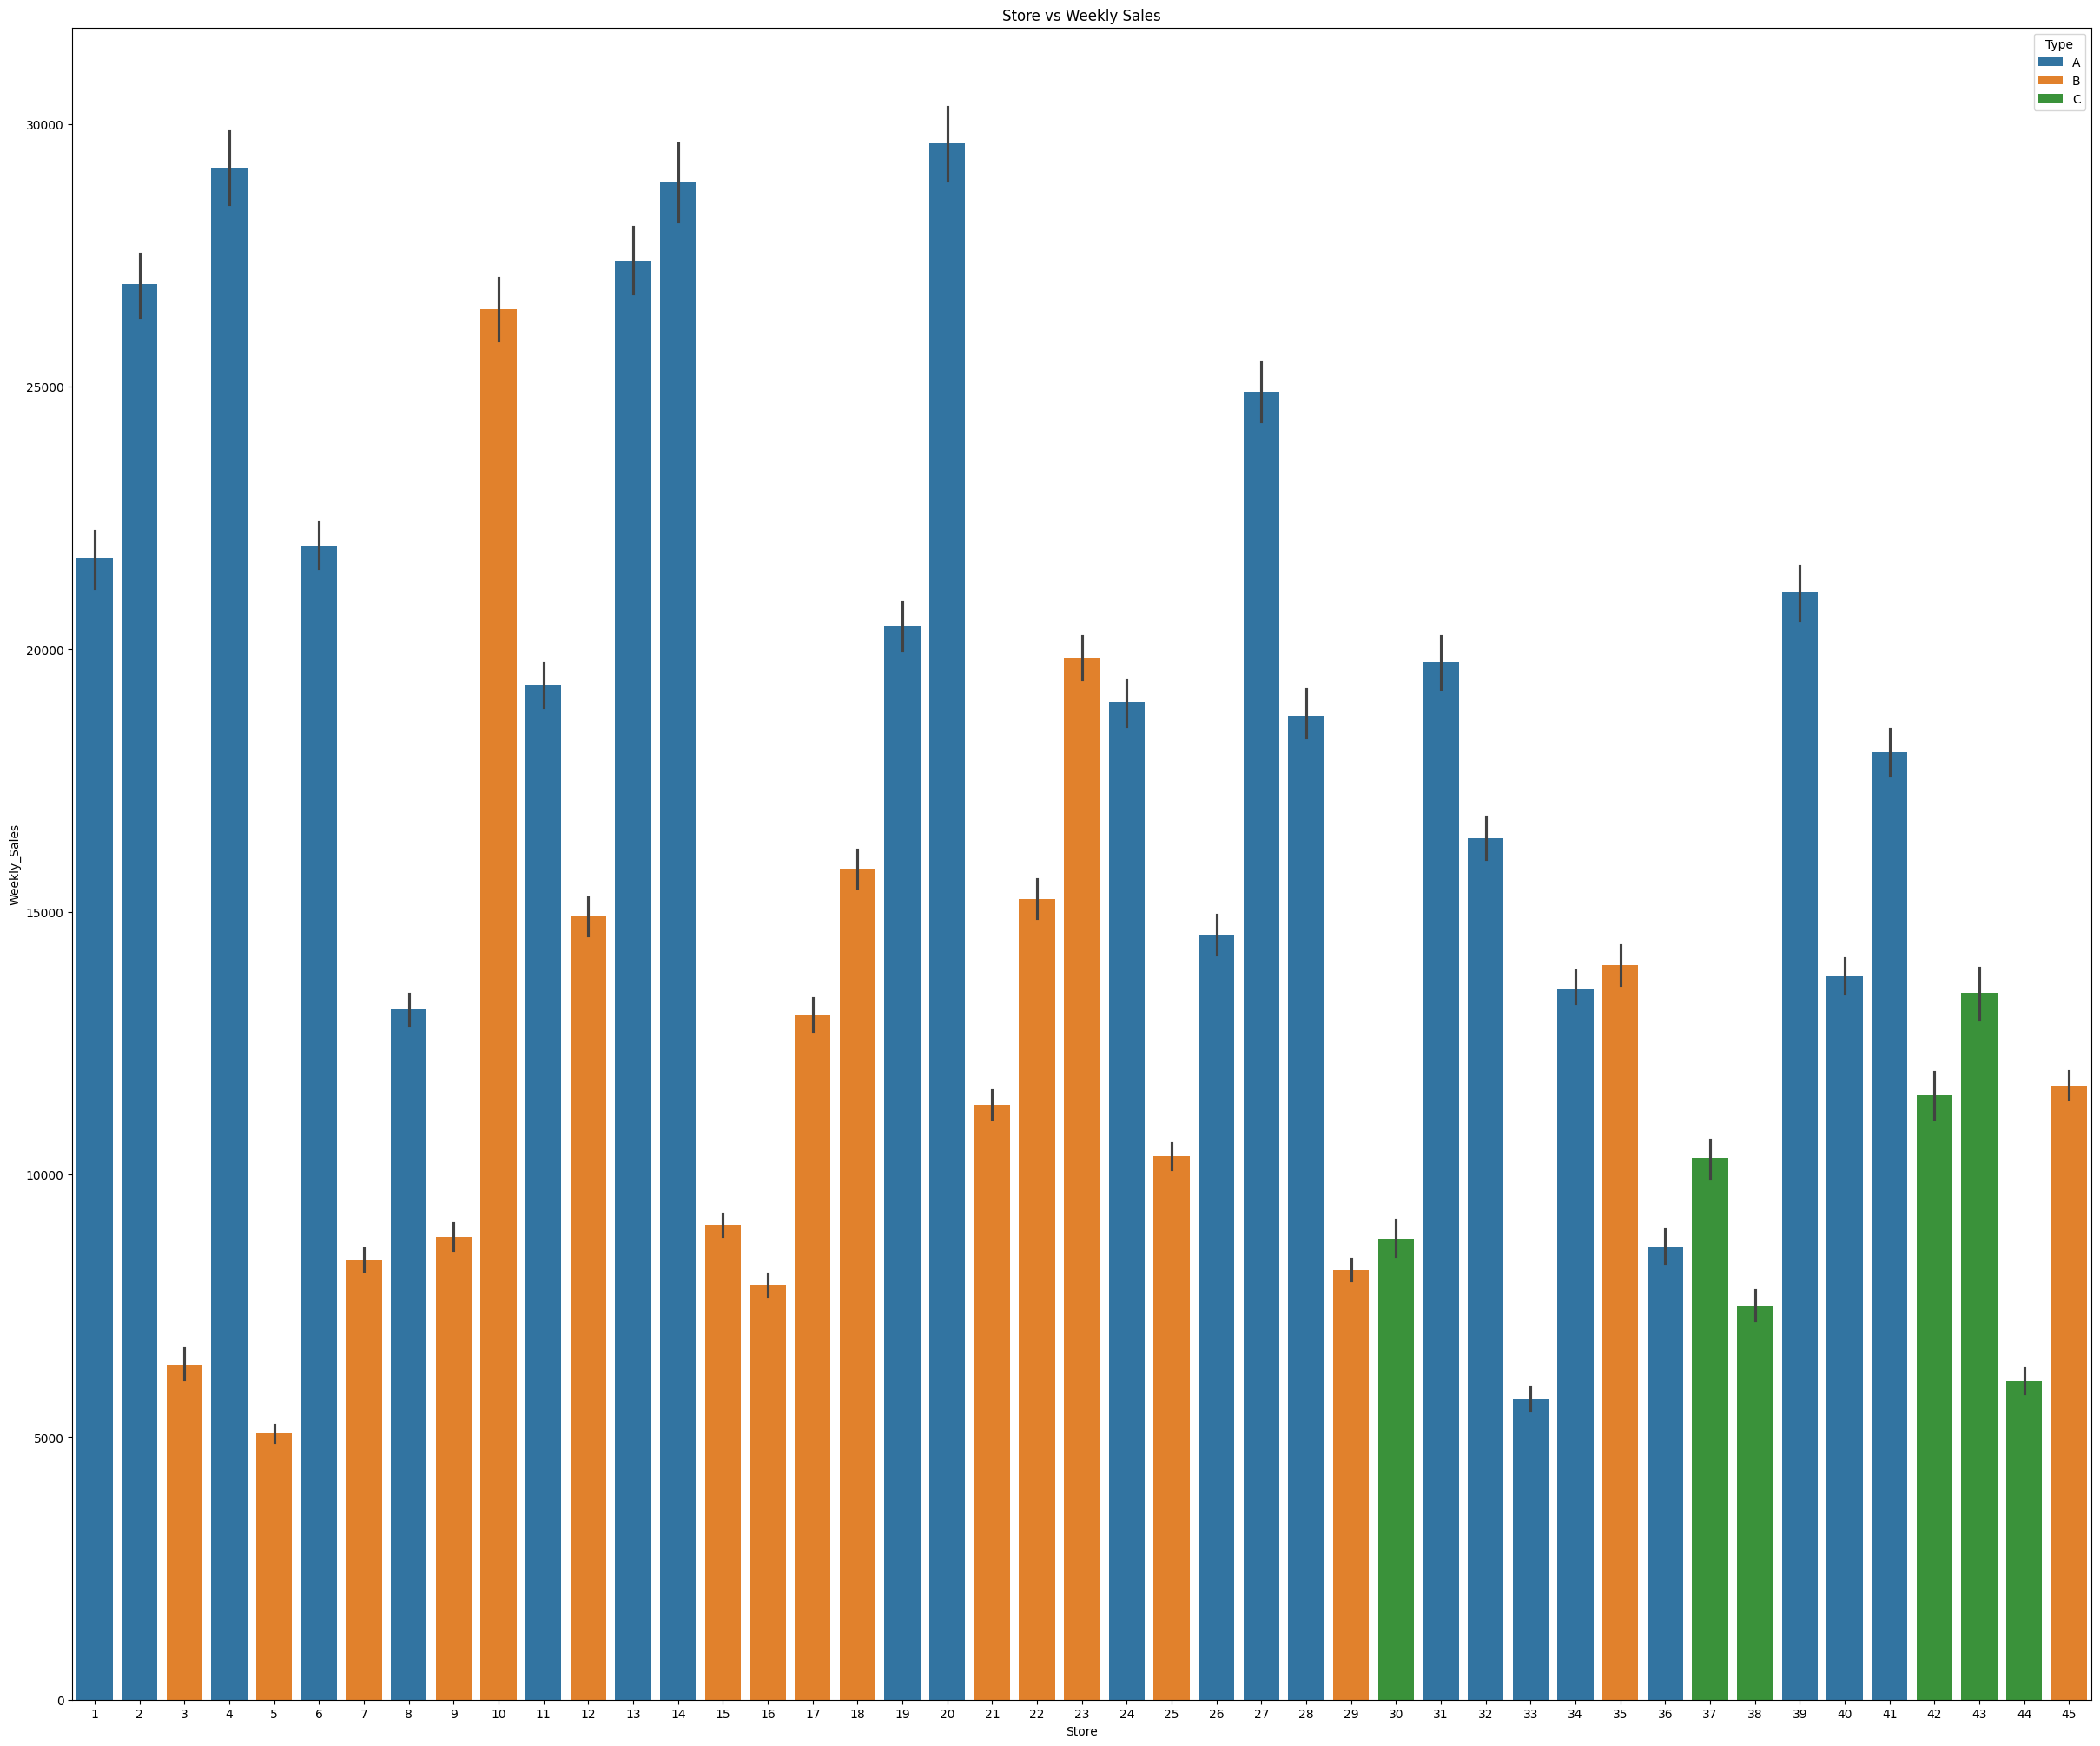

In [213]:
plt.figure(figsize=(30,25))
sns.barplot(x=new_train['Store'], y=new_train['Weekly_Sales'],hue=new_train['Type'])
plt.title('Store vs Weekly Sales')
plt.show()

## Date

In [214]:
new_train['Date'] = pd.to_datetime(new_train['Date'])

In [215]:
new_train['Week'] = new_train['Date'].dt.isocalendar().week
new_train['Year'] = pd.DatetimeIndex(new_train['Date']).year 
new_train['Month']=pd.DatetimeIndex(new_train['Date']).month 

In [216]:
traindf4=new_train.copy()

In [217]:
new_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Month
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2010,2
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,6,2010,2
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,7,2010,2
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,8,2010,2
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,9,2010,3


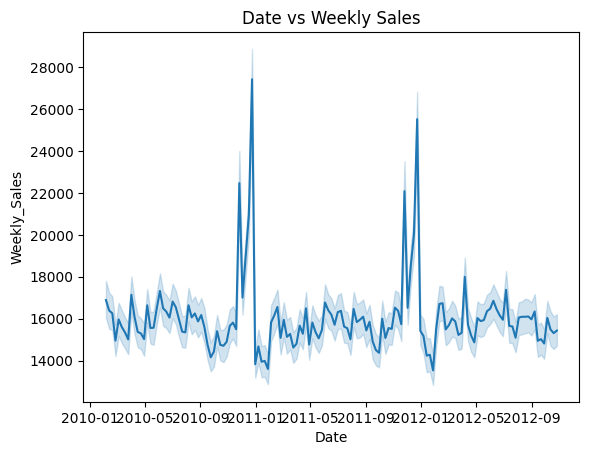

<Figure size 1000x1000 with 0 Axes>

In [218]:
plt.title('Date vs Weekly Sales')
sns.lineplot(x ='Date',y = "Weekly_Sales",data = new_train)
plt.figure(figsize=(10,10))
# sns.set(rc = {'figure.figsize':(40,10)})
plt.show()

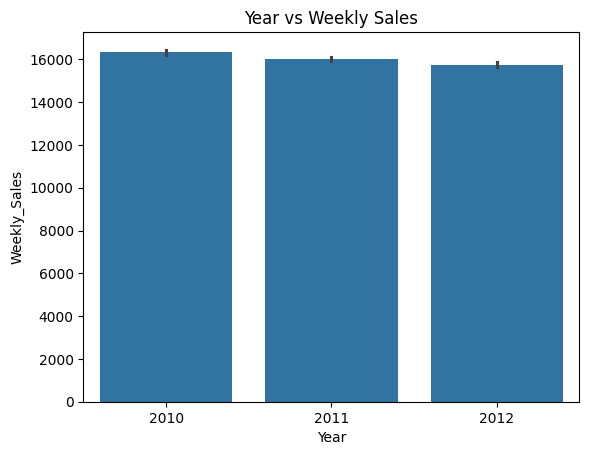

In [219]:
# plt.figure(figsize=(10,10))
sns.barplot(x=new_train['Year'], y=new_train['Weekly_Sales'])
plt.title('Year vs Weekly Sales')
plt.show()

<Axes: xlabel='Month'>

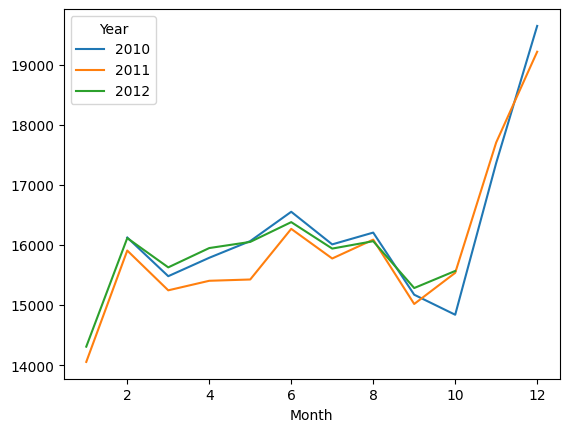

In [220]:
month_wise_sales=pd.pivot_table(new_train, values = "Weekly_Sales", columns = "Year", index = "Month")
month_wise_sales.plot()

<Axes: xlabel='Week'>

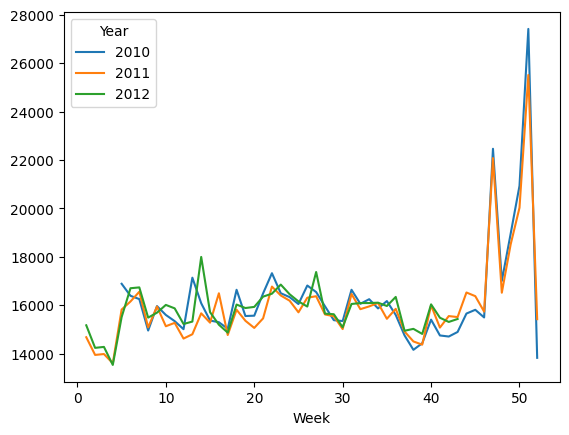

In [221]:
week_wise_sales=pd.pivot_table(new_train, values = "Weekly_Sales", columns = "Year", index = "Week")
week_wise_sales.plot()


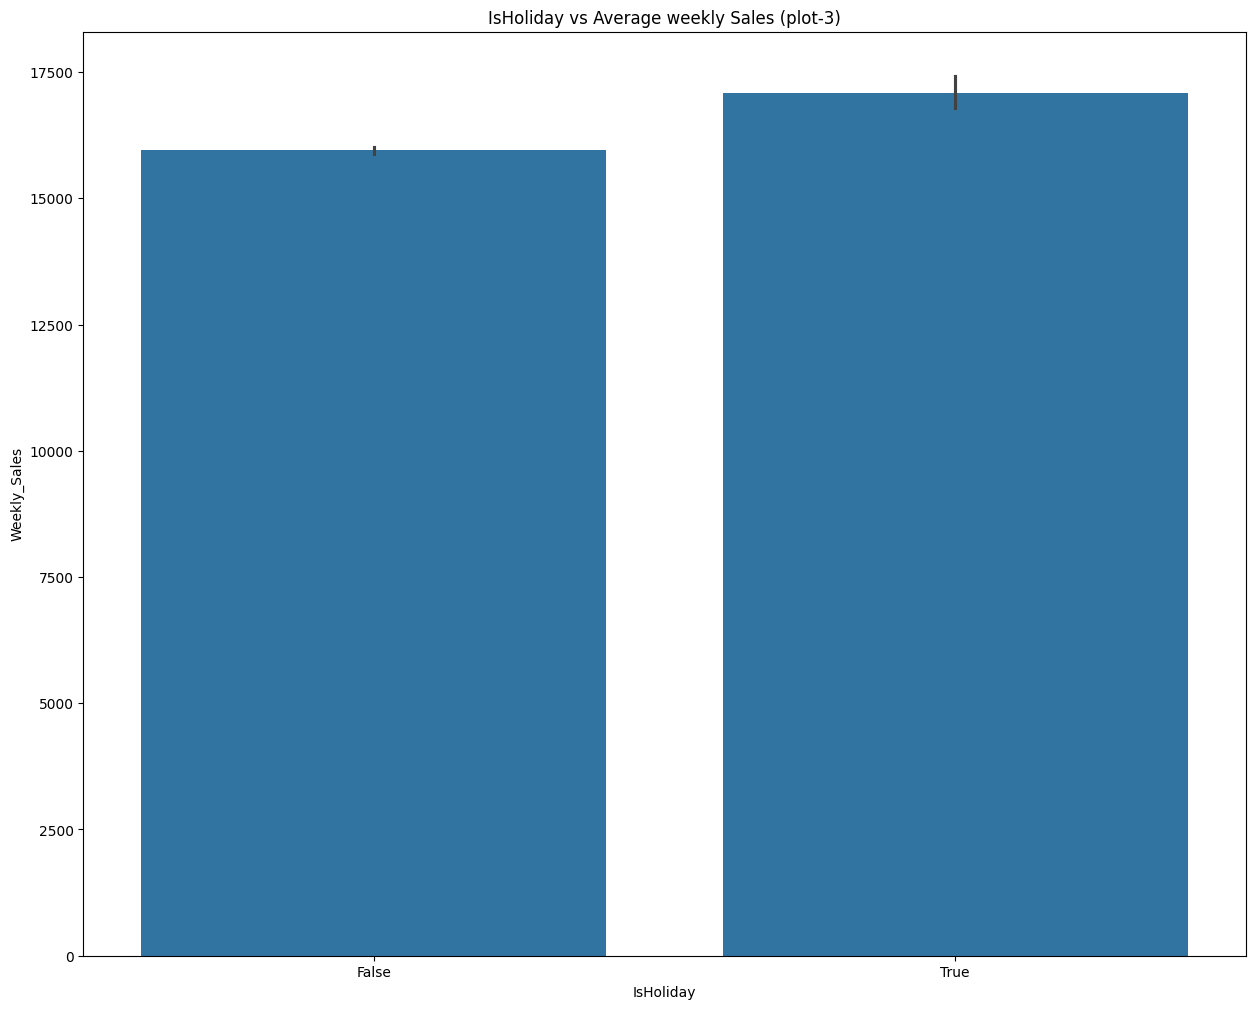

In [222]:
plt.figure(figsize=(15,12))
sns.barplot(x=new_train['IsHoliday'], y=new_train['Weekly_Sales'])
plt.title('IsHoliday vs Average weekly Sales (plot-3)')
plt.show()

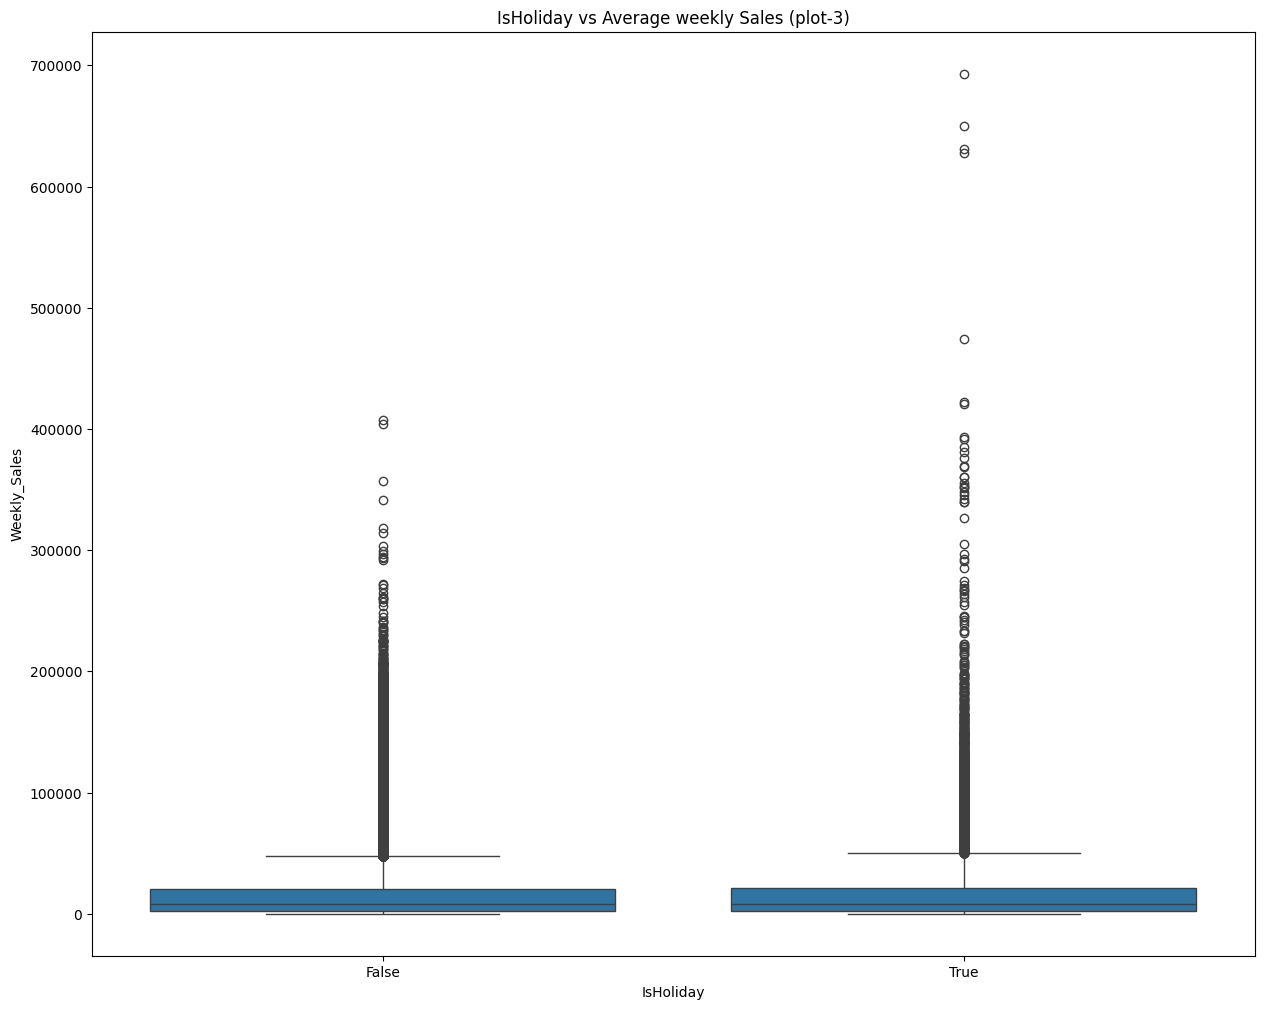

In [223]:
plt.figure(figsize=(15,12))
sns.boxplot(x=new_train['IsHoliday'], y=new_train['Weekly_Sales'])
plt.title('IsHoliday vs Average weekly Sales (plot-3)')
plt.show()

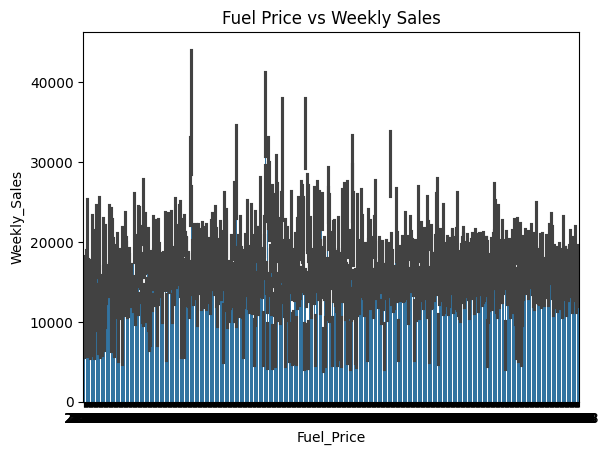

In [224]:
plt.title('Fuel Price vs Weekly Sales')
sns.barplot(x ='Fuel_Price',y = "Weekly_Sales",data = new_train)
# plt.figure(figsize=(40,25))
# sns.set(rc = {'figure.figsize':(40,10)})
plt.show()

<Axes: xlabel='Fuel_Price'>

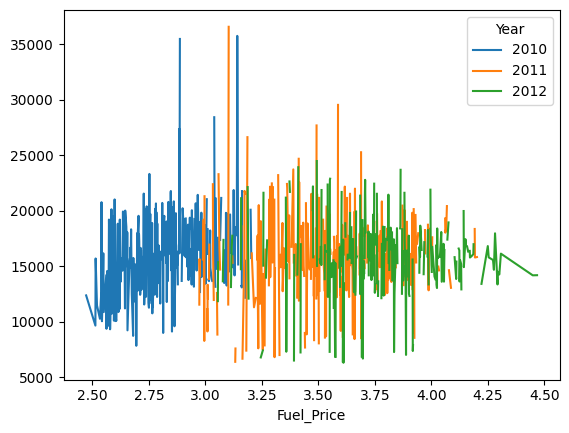

In [225]:
fuel_sales=pd.pivot_table(new_train, values = "Weekly_Sales", columns = "Year", index = "Fuel_Price")
fuel_sales.plot()


In [226]:
# Fuel Price categorizing
def fuel(x):
    if x>2 and x<2.25:
        return 2
    elif x>2.25 and x<2.5:
        return 2.25
    elif x>2.5 and x<2.75:
        return 2.5
    elif x>2.75 and x<3:
        return 2.75
    elif x>3 and x<3.25:
        return 3
    elif x>3.25 and x<3.5:
        return 3.25
    elif x>3.5 and x<3.75:
        return 3.5
    elif x>3.75 and x<4:
        return 3.75
    elif x>4 and x<4.25:
        return 4
    else:
        return 4.25


list_of_fuel = new_train['Fuel_Price']
new_list = list_of_fuel.map(fuel)
new_train['Fuel_Price_Cat'] = new_list

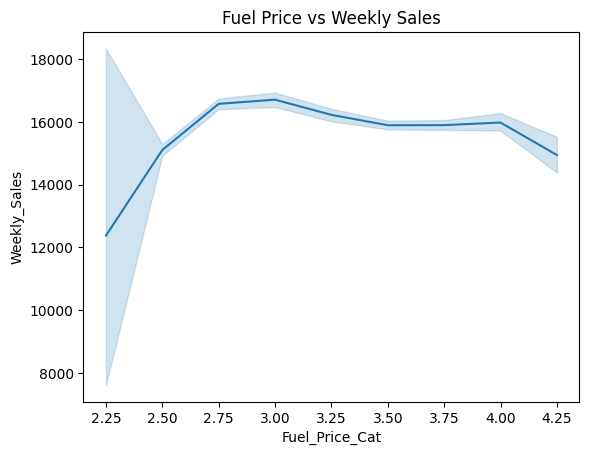

In [227]:
plt.title('Fuel Price vs Weekly Sales')
sns.lineplot(x ='Fuel_Price_Cat',y = "Weekly_Sales",data = new_train)
# plt.figure(figsize=(40,25))
# sns.set(rc = {'figure.figsize':(40,10)})
plt.show()

<Axes: xlabel='CPI', ylabel='Density'>

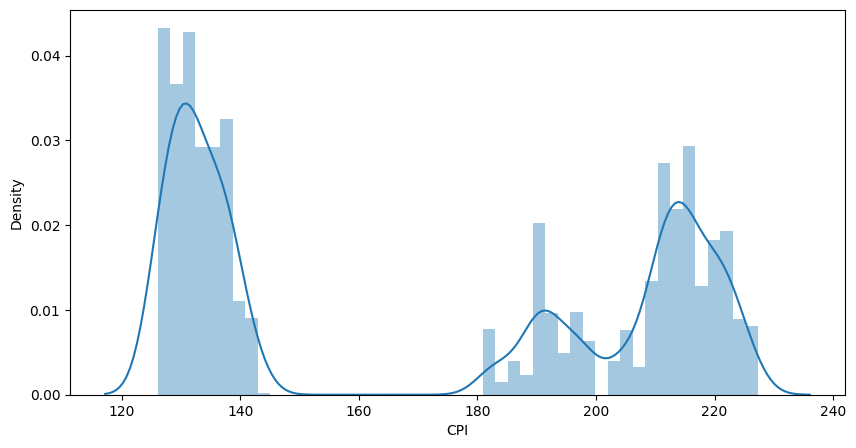

In [228]:
plt.figure(figsize=(10,5))
sns.distplot(new_train['CPI'])

Text(0.5, 1.0, 'Weekly_sales vs CPI')

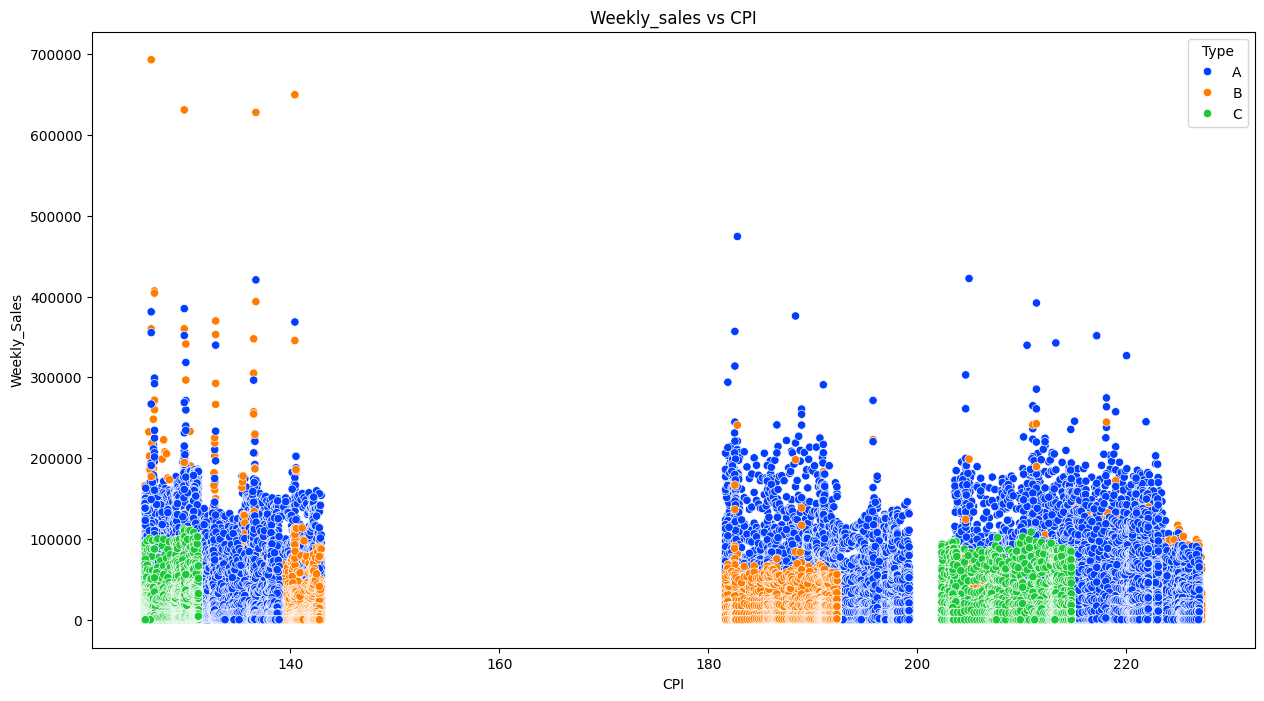

In [229]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=new_train['CPI'],y=new_train['Weekly_Sales'],hue=new_train['Type'],
                palette='bright')
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.title('Weekly_sales vs CPI')

Text(0.5, 1.0, 'Weekly_sales vs Unemployment')

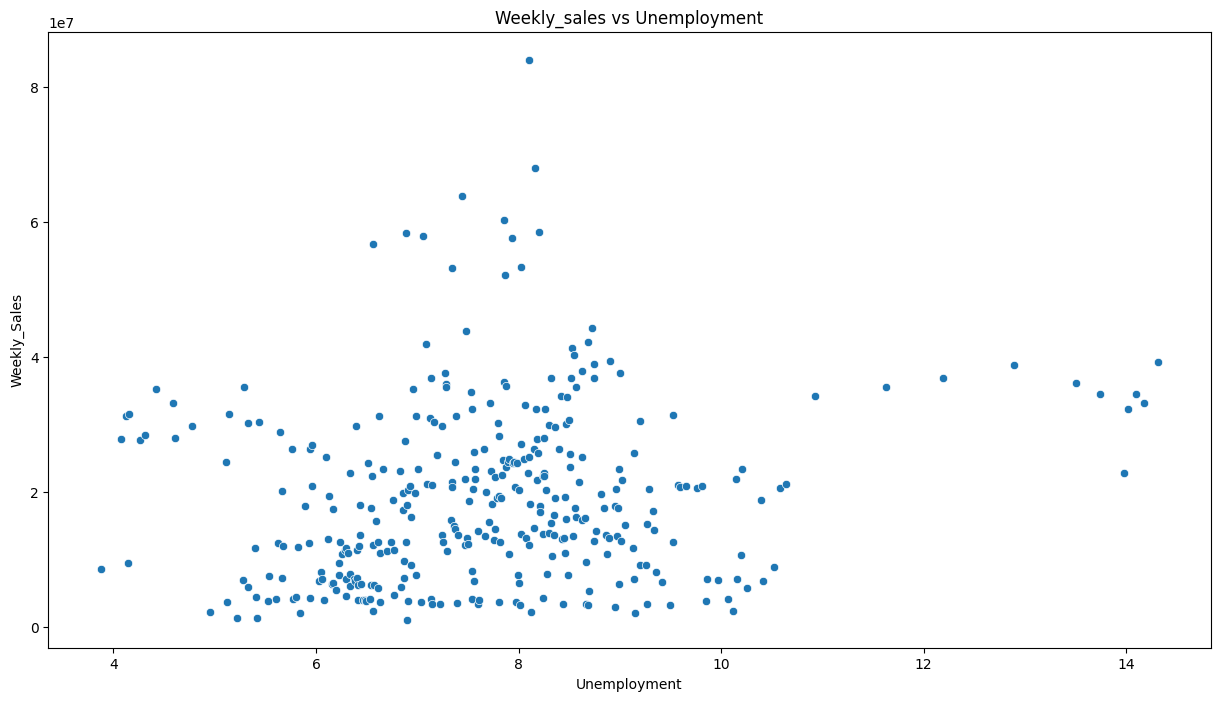

In [230]:
df1 = new_train.groupby('Unemployment')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.scatterplot(x=df1['Unemployment'],y=df1['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.title('Weekly_sales vs Unemployment')

In [231]:
new_train['Unemployment'].describe()

count    420212.000000
mean          7.960000
std           1.863879
min           3.879000
25%           6.891000
50%           7.866000
75%           8.567000
max          14.313000
Name: Unemployment, dtype: float64

<Axes: xlabel='Unemployment', ylabel='Density'>

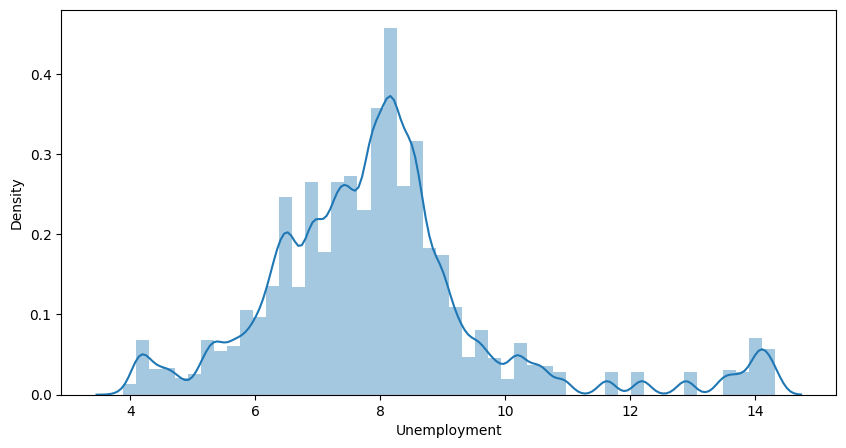

In [232]:
plt.figure(figsize=(10,5))
sns.distplot(new_train['Unemployment'])

## Bivariate Analysis

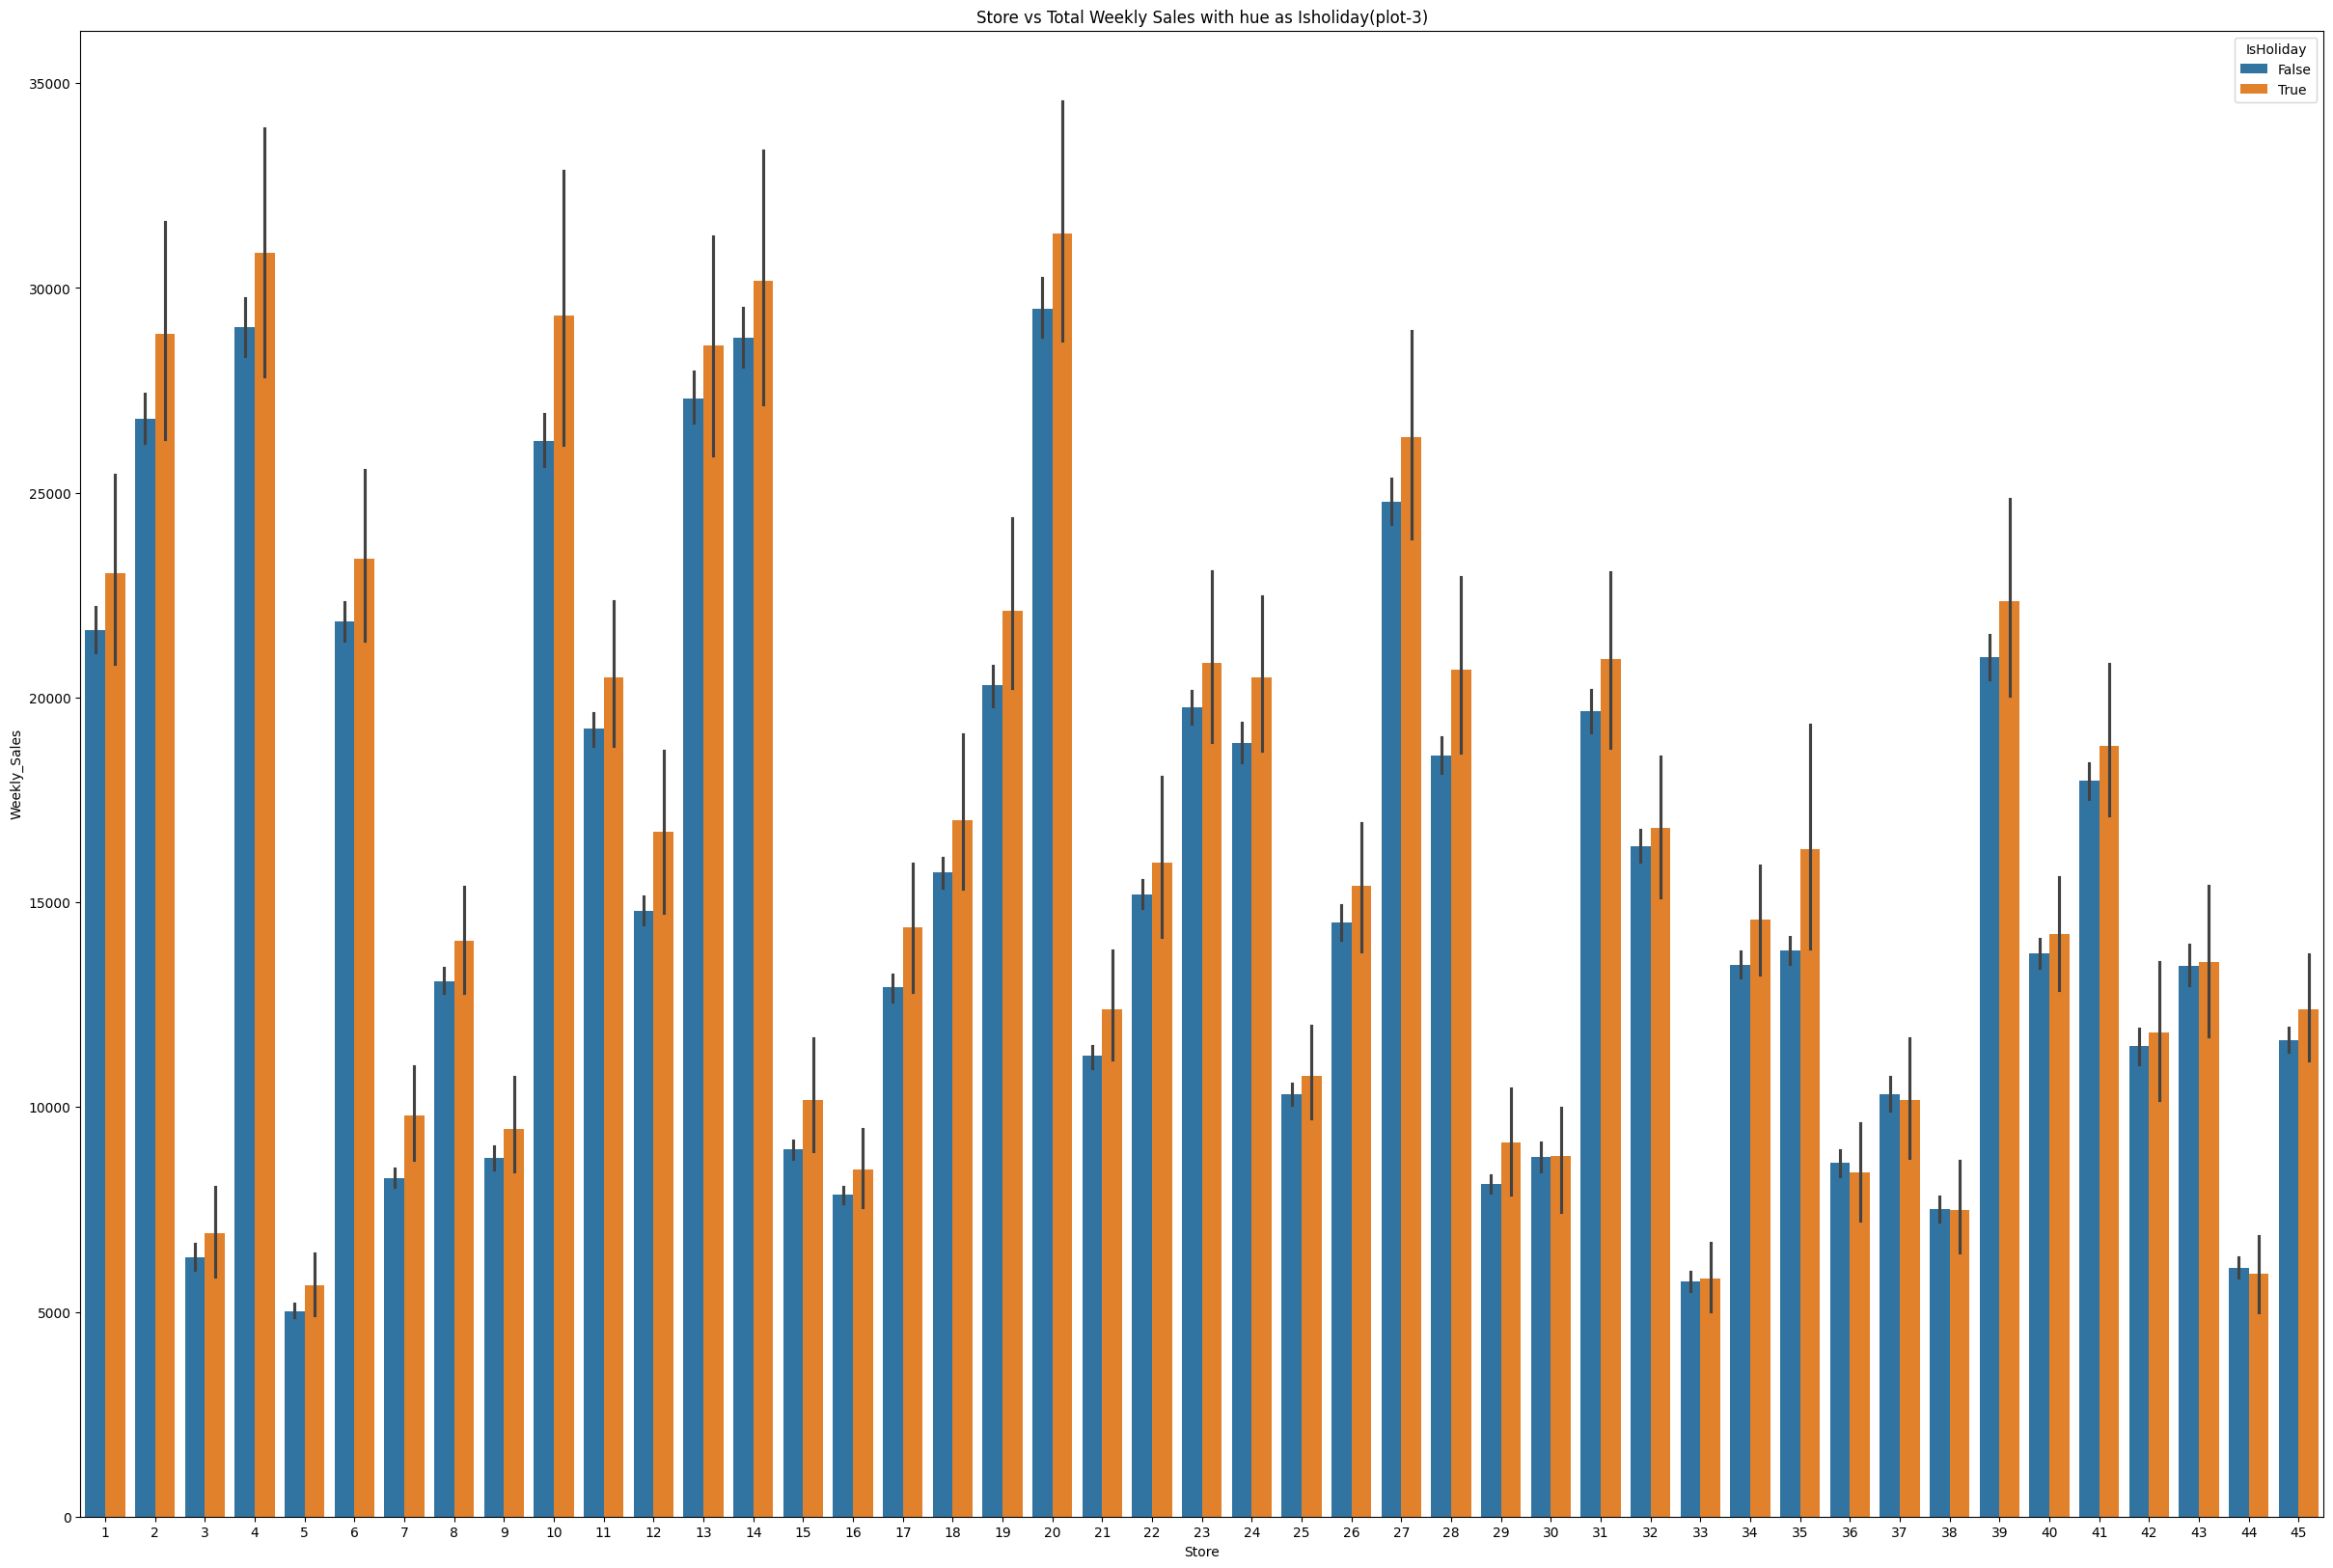

In [233]:
plt.figure(figsize=(30,20))
sns.barplot(x=new_train['Store'], y=new_train['Weekly_Sales'], hue=new_train['IsHoliday'])
plt.title('Store vs Total Weekly Sales with hue as Isholiday(plot-3)')
plt.show()

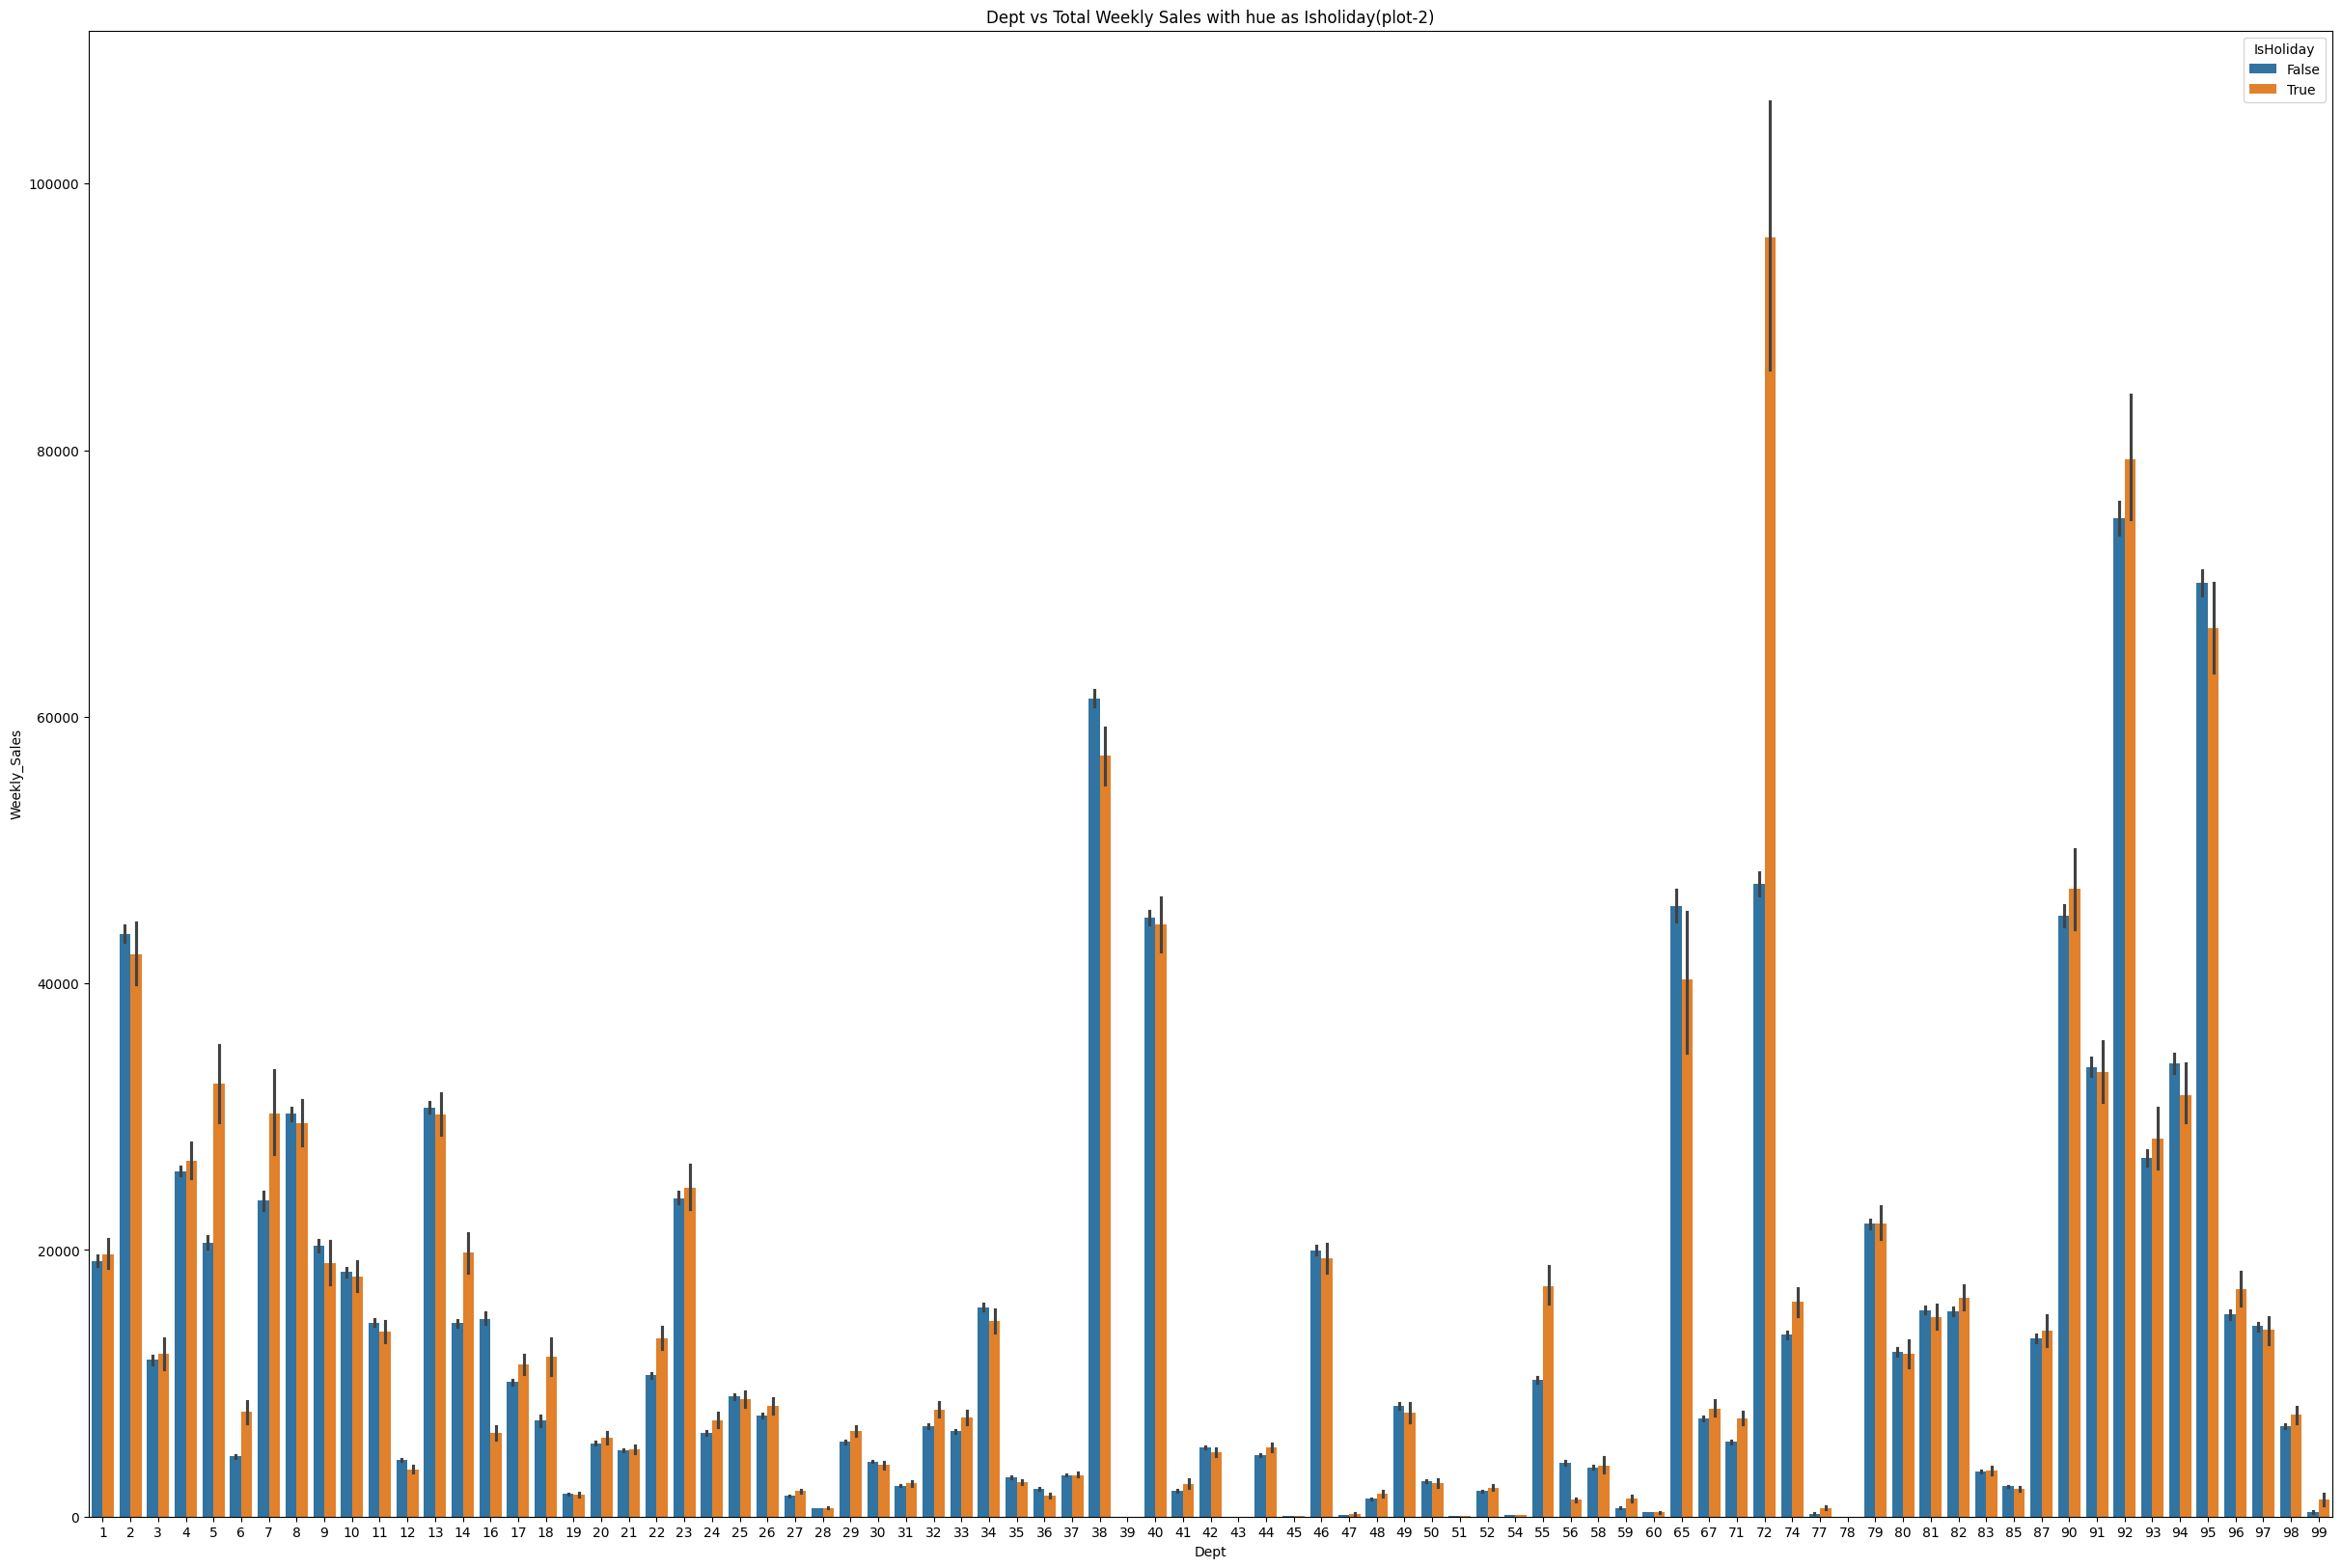

In [234]:
plt.figure(figsize=(30,20))
sns.barplot(x=new_train['Dept'], y=new_train['Weekly_Sales'], hue=new_train['IsHoliday'])
plt.title('Dept vs Total Weekly Sales with hue as Isholiday(plot-2)')
plt.show()

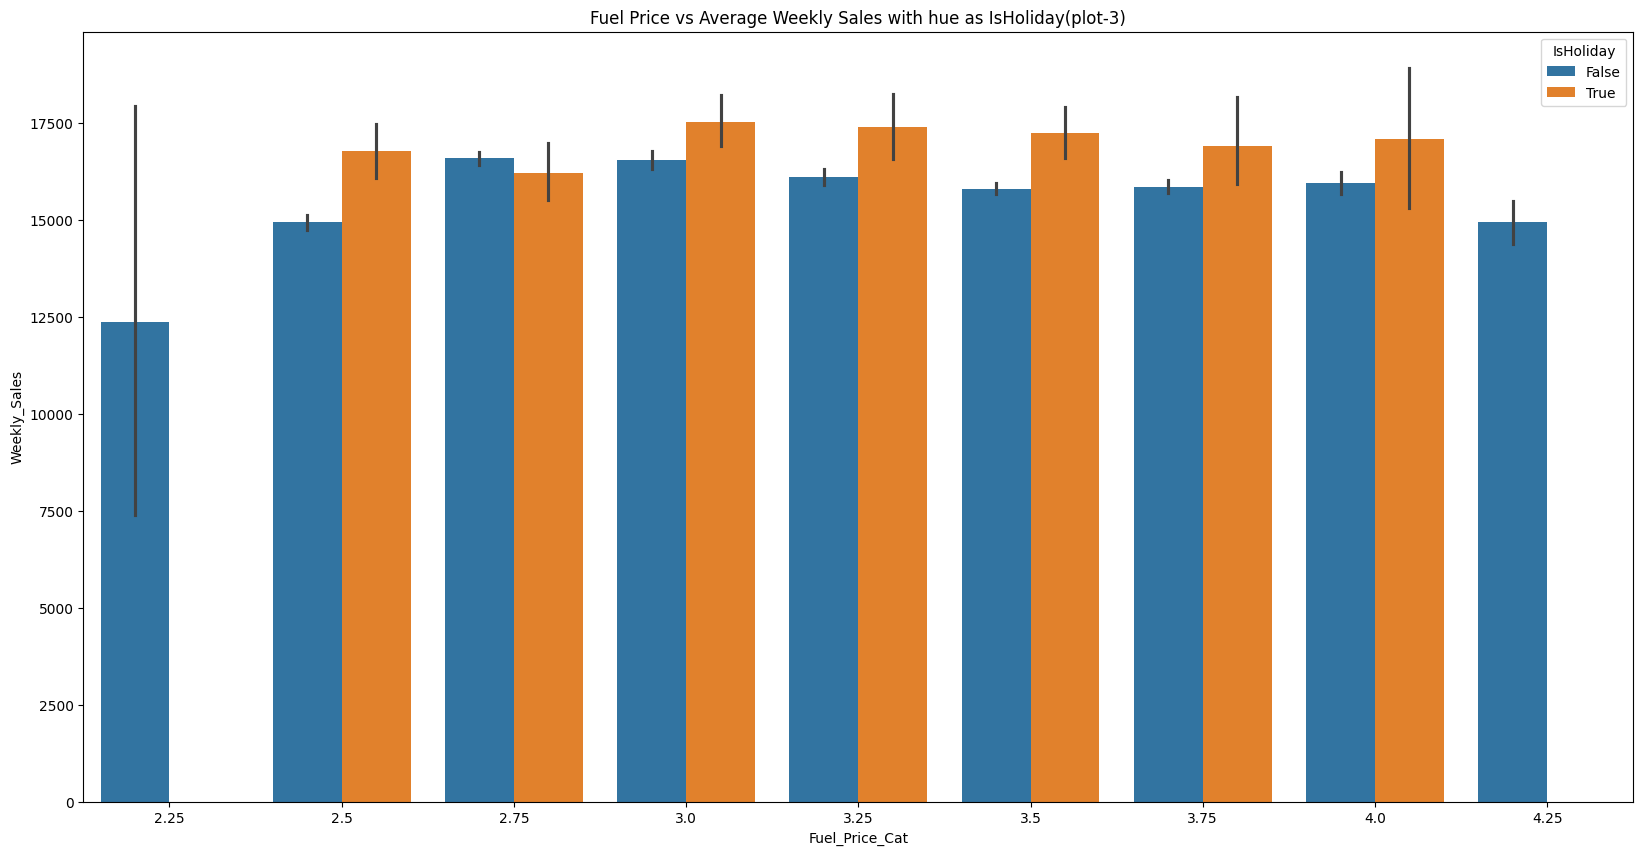

In [235]:
plt.figure(figsize=(20,10))
sns.barplot(x=new_train['Fuel_Price_Cat'], y=new_train['Weekly_Sales'], hue=new_train['IsHoliday'])
plt.title('Fuel Price vs Average Weekly Sales with hue as IsHoliday(plot-3)')
plt.show()

Text(0.5, 1.0, 'Type vs Averag weeekly sales with hue as IsHoliday (plot-2)')

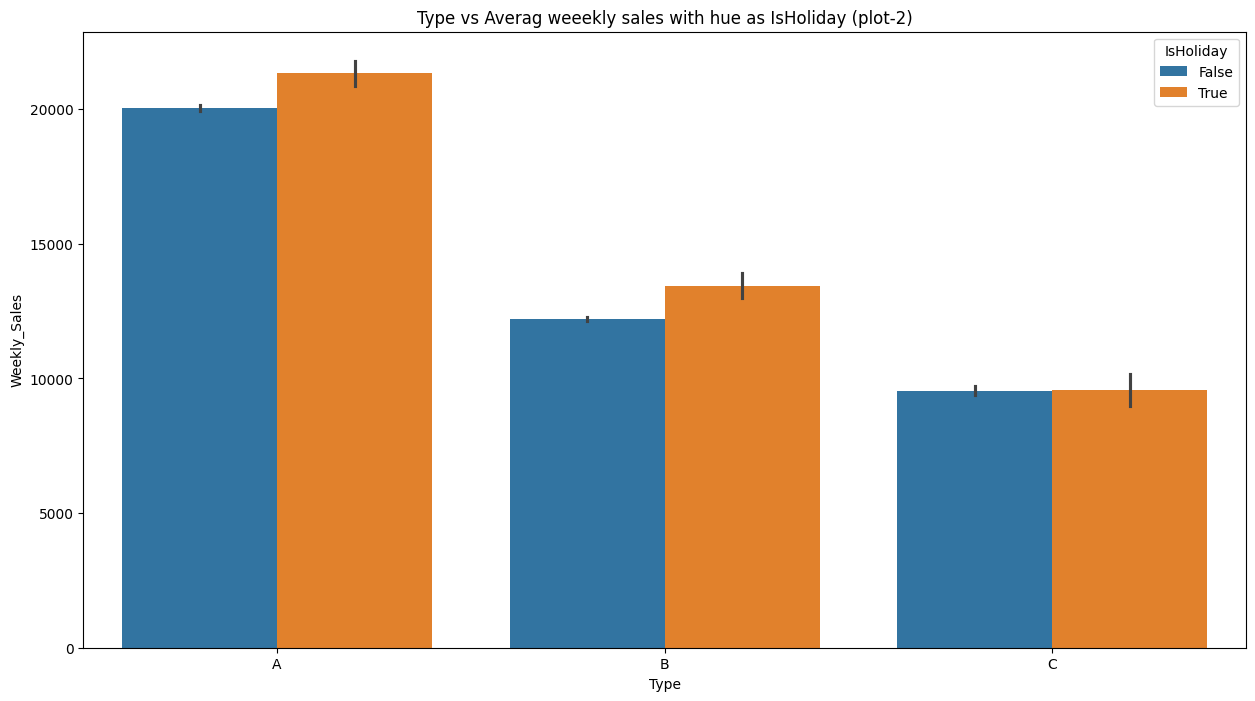

In [236]:
plt.figure(figsize=(15,8))
sns.barplot(x=new_train['Type'], y=new_train['Weekly_Sales'], hue=new_train['IsHoliday'])
plt.title('Type vs Averag weeekly sales with hue as IsHoliday (plot-2)')

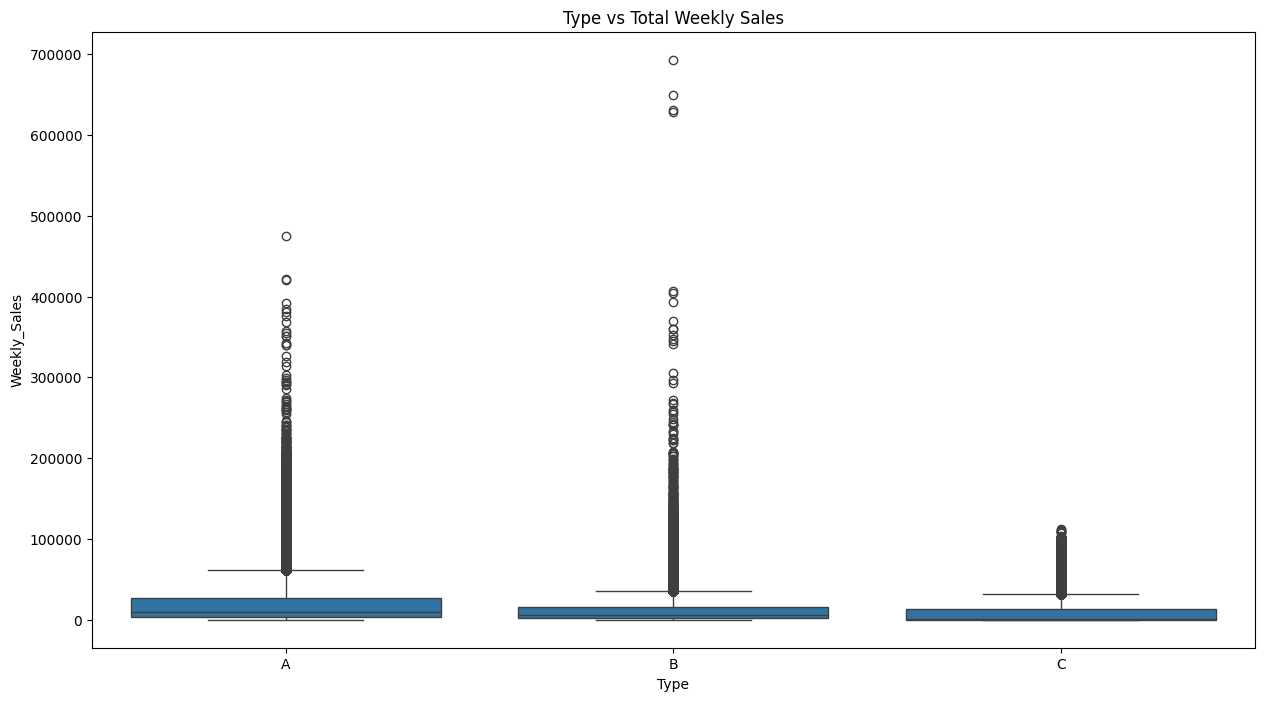

In [237]:
plt.figure(figsize=(15,8))
sns.boxplot(x=new_train['Type'], y=new_train['Weekly_Sales'])
plt.title('Type vs Total Weekly Sales')
plt.show()

In [238]:
def maping_type(df):
    df['Type'] = df['Type'].map({'A':'1','B':'2','C':'3'})
    return df

In [239]:
maping_type(new_train)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Month,Fuel_Price_Cat
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,211.096358,8.106,5,2010,2,2.50
1,1,1,2010-02-12,46039.49,True,1,151315,38.51,2.548,211.242170,8.106,6,2010,2,2.50
2,1,1,2010-02-19,41595.55,False,1,151315,39.93,2.514,211.289143,8.106,7,2010,2,2.50
3,1,1,2010-02-26,19403.54,False,1,151315,46.63,2.561,211.319643,8.106,8,2010,2,2.50
4,1,1,2010-03-05,21827.90,False,1,151315,46.50,2.625,211.350143,8.106,9,2010,3,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2,118221,64.88,3.997,192.013558,8.684,39,2012,9,3.75
421566,45,98,2012-10-05,628.10,False,2,118221,64.89,3.985,192.170412,8.667,40,2012,10,3.75
421567,45,98,2012-10-12,1061.02,False,2,118221,54.47,4.000,192.327265,8.667,41,2012,10,4.25
421568,45,98,2012-10-19,760.01,False,2,118221,56.47,3.969,192.330854,8.667,42,2012,10,3.75


In [240]:
def convert_to_int(df): 
    df['Type']=df['Type'].astype(int)
    df['IsHoliday']=df['IsHoliday'].astype(int)
    return df

In [242]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# # Encode labels in column 'species'.
# new_train['IsHoliday']= label_encoder.fit_transform(new_train['IsHoliday'])
# new_train['Type']= label_encoder.fit_transform(new_train['Type'])
# new_train

In [241]:
convert_to_int(new_train)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Month,Fuel_Price_Cat
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,5,2010,2,2.50
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,6,2010,2,2.50
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,211.289143,8.106,7,2010,2,2.50
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,211.319643,8.106,8,2010,2,2.50
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,211.350143,8.106,9,2010,3,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,8.684,39,2012,9,3.75
421566,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,8.667,40,2012,10,3.75
421567,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,8.667,41,2012,10,4.25
421568,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,8.667,42,2012,10,3.75


In [243]:
new_train=new_train.drop(['Date'],axis=1)

In [244]:
X=new_train.drop(['Weekly_Sales'], axis=1)
y = new_train['Weekly_Sales']

In [245]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [267]:
X_train.columns

Index(['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Year', 'Month',
       'Fuel_Price_Cat'],
      dtype='object')

In [248]:
X_train.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Month,Fuel_Price_Cat
389344,41,83,0,1,196321,33.00,2.712,190.993144,7.508,48,2010,12,2.50
75831,8,60,0,1,155078,68.72,3.467,219.788581,6.425,38,2011,9,3.25
162655,17,40,1,2,93188,32.81,3.445,129.836400,6.617,47,2011,11,3.25
187357,20,1,0,1,203742,78.09,2.793,204.362566,7.527,27,2010,7,2.75
24134,3,27,1,2,37392,51.65,3.409,223.753643,6.833,6,2012,2,3.25


## Feature Importance

In [249]:
imf = RandomForestRegressor()
imf.fit(X_train, y_train)

RandomForestRegressor()

In [250]:
feature_imp_df = pd.DataFrame()
feature_imp_df['imp_features'] = imf.feature_importances_
feature_imp_df['feature_names'] = X_train.columns
feature_imp_df = feature_imp_df.sort_values(by='imp_features', ascending=False)
feature_imp_df.head()

,imp_features,feature_names
1,0.624393,Dept
4,0.190064,Size
0,0.059055,Store
9,0.043448,Week
7,0.027751,CPI


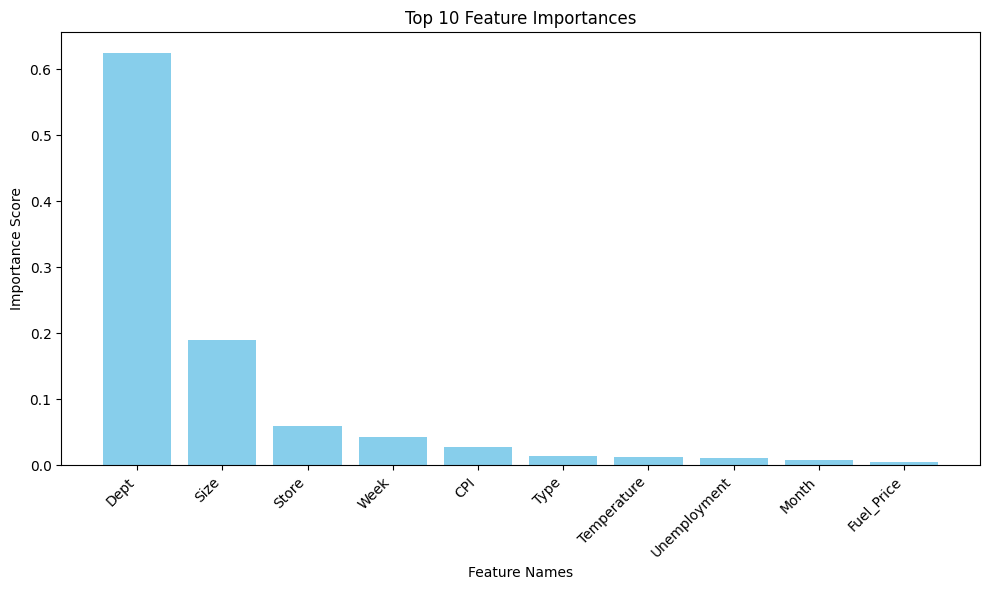

In [251]:
plt.figure(figsize=(10, 6))
plt.bar(feature_imp_df['feature_names'][:10], feature_imp_df['imp_features'][:10], color='skyblue')
plt.xlabel('Feature Names')
plt.ylabel('Importance Score')
plt.title('Top 10 Feature Importances')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

## Model Building


In [252]:
rf_acc = imf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.61510575333348


In [253]:
y_pred_rf = imf.predict(X_test)

In [254]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
# rf_df.to_csv('./predictions/rf_real_pred.csv')
rf_df

,Actual,Predicted
198556,18526.46,18610.1016
342491,84.00,130.2605
267645,27025.56,30615.5619
169044,48324.54,45113.7760
45102,2968.68,3262.3205
...,...,...
276446,46104.16,36210.2767
144808,1109.83,885.0905
405575,19.76,78.2843
66690,307.84,344.8282


In [257]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [258]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  94.41371720008624


In [259]:
y_pred_xgb = xgbr.predict(X_test)

In [260]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [261]:
dt_acc=dt.score(X_test,y_test)*100
print("DecisionTree Regressor Accuracy - ",dt_acc)

DecisionTree Regressor Accuracy -  95.78448230525325


In [265]:
X_test.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Month,Fuel_Price_Cat
198556,21,8,0,2,140167,54.68,2.720,210.873332,8.324,11,2010,3,2.50
342491,36,20,0,1,39910,42.87,2.971,210.237973,8.395,2,2011,1,2.75
267645,28,5,0,1,206302,54.20,3.813,129.826833,12.890,46,2011,11,3.75
169044,18,13,0,2,120653,21.33,2.788,131.527903,9.202,5,2010,2,2.75
45102,5,42,0,2,34875,52.47,2.732,211.571892,6.566,12,2010,3,2.50


In [268]:
imf.predict(X_test.head(1))

array([18610.1016])

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
train = train_df.merge(store_df, how='left').merge(feature_df, how='left')
test = test_df.merge(store_df, how='left').merge(feature_df, how='left')

In [264]:
import pickle
pickle.dump(imf,open('model.pkl','wb'))